![title](images/header.png)

# Vd - Merging eSBAE with CEO data (phase I 2015-2020)
-------
This notebook merges validated data from the stratified random CEO data (2015-2022) with eSBAE points for estimation of areas
This script requires minimum an m16 instance and select the python 3 kernel
###### For more information contact aurelie.shapiro@fao.org or remi.dannunzio@fao.org

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
# Set the display option to a large value to prevent text wrapping
pd.set_option('display.max_colwidth', None)

#### combine all CEO sample files
download your CEO sample files from collect.earth and upload to SEPAL using FileZilla.
add as many files as you have projects

In [2]:
#DRC
#ceo1 = pd.read_csv('/home/sepal-user/module_results/esbae/DRC/ceo-CAFI-DDD-RDC-eSBAE-validation-1-sample-data_prov.csv')
#ceo2 = pd.read_csv('/home/sepal-user/module_results/esbae/DRC/ceo-CAFI-DDD-RDC-eSBAE-validation-2-sample-data.csv')
#ceo3 = pd.read_csv('/home/sepal-user/module_results/esbae/DRC/ceo-CAFI-DDD-RDC-eSBAE-validation-3-sample-data.csv')
#GAB
ceo1 = pd.read_csv('/home/sepal-user/module_results/esbae/GAB/ceo-CAFI-DDD-Gabon-eSBAE-validation-1-sample-data.csv')
ceo2 = pd.read_csv('/home/sepal-user/module_results/esbae/GAB/ceo-CAFI-DDD-Gabon-eSBAE-validation-2-sample-data.csv')
ceo3 = pd.read_csv('/home/sepal-user/module_results/esbae/GAB/ceo-CAFI-DDD-Gabon-eSBAE-validation-3-sample-data.csv')
ceo4 = pd.read_csv('/home/sepal-user/module_results/esbae/GAB/ceo-CAFI-DDD-Gabon-eSBAE-validation-4-sample-data.csv')
ceo5 = pd.read_csv('/home/sepal-user/module_results/esbae/GAB/ceo-CAFI-DDD-Gabon-eSBAE-validation-5-sample-data.csv')

In [3]:
column_names = ceo1.columns.tolist()
# Print the list of column names
print(column_names)

['plotid', 'sampleid', 'lon', 'lat', 'email', 'flagged', 'collection_time', 'analysis_duration', 'imagery_title', 'imagery_attributions', 'sample_geom', 'pl_aspect', 'pl_brightness_max', 'pl_red_mean', 'pl_greenness_max', 'pl_cusum_confidence', 'pl_cusum_change_date', 'pl_nir_max', 'pl_red_min', 'pl_bfast_means', 'pl_elevation', 'pl_red_sd', 'pl_cnc_1520', 'pl_swir1_sd', 'pl_index', 'pl_tmf_sub', 'pl_dw_tree_prob__min', 'pl_bs_slope_max', 'pl_red_max', 'pl_images', 'pl_dist', 'pl_bfast_magnitude', 'pl_ccdc_magnitude', 'pl_simple_combined', 'pl_tmf_defyear', 'pl_greenness_mean', 'pl_tmf_2019', 'pl_swir2_sd', 'pl_nir_sd', 'pl_gfc_tc00', 'pl_greenness_min', 'pl_tmf_degyear', 'pl_tmf_2020', 'pl_tmf_2017', 'pl_bs_slope_min', 'pl_lang_tree_height', 'pl_bs_slope_sd', 'pl_dw_class_mode', 'pl_swir1_mean', 'pl_wetness_sd', 'pl_bs_slope_mean', 'pl_ccdc_change_date', 'pl_dw_tree_prob_mean', 'pl_nir_mean', 'pl_dw_tree_prob__stddev', 'pl_tmf_2016', 'pl_nir_min', 'pl_esri_lc17', 'pl_wetness_mean', 'p

make a list of the ceo files for processing

In [5]:
#depends on how many files you have
ceo_files = [ceo1, ceo2, ceo3, ceo4, ceo5]
#ceo_files = [ceo1, ceo2, ceo3]
#ceo_files = [ceo1, ceo2]

##### add a column named "interpreted" which = 1 when the point has been validated in CEO, otherwise 0
count the number of validated points per ceo file
replace forest and non-forest types with codes

In [6]:
# List to store the modified DataFrames
modified_ceo_files = []

# Initialize collection counter
collection_counter = 1

for i, ceo in enumerate(ceo_files):
       
    # Sort the DataFrame by 'date' in descending order
    ceo.sort_values(by='collection_time', ascending=True, inplace=True)

    # Remove duplicates keeping the last occurrence (the most recent date)
    ceo.drop_duplicates(subset='pl_point_id', keep='first', inplace=True)

    # Reset the index
    ceo.reset_index(drop=True, inplace=True)
    
    # Add 'collection' column with an increasing number
    ceo['collection'] = collection_counter
    
    # Add 'interpreted' column with 1 when 'email' is not null, otherwise 0
    ceo['interpreted'] = np.where(ceo['email'].notna(), 1, 0)
    
    # Calculate total count for each 'interpreted' value
    interpreted_counts = ceo['interpreted'].value_counts().to_dict()
    
    # Append the modified DataFrame to the list
    modified_ceo_files.append(ceo)
    
    # Print count for the current DataFrame
    print(f"ceo {i + 1} # of validated points: {interpreted_counts.get(1, 0)}, # of not validated points: {interpreted_counts.get(0, 0)}")
    
    # Increment the collection counter
    collection_counter += 1

# Concatenate the modified DataFrames into one merged DataFrame
merged_ceo = pd.concat(modified_ceo_files, ignore_index=True)


# Specify the columns you want to keep in the merged DataFrame
columns_to_keep = ['plotid', 'sampleid', 'lon', 'lat', 'email', 'flagged', 'collection_time', 'analysis_duration', 
                    'sample_geom', 'pl_point_id', 'pl_chg_prob', 'pl_simple_combined', 'pl_strata', 'forêt ou non-forêt en 2015?', "Y'a t'il de la régéneration", 
                    'Changement entre 2015-2022', 'Type de Changement (2015-2022)', 'Exploitation forestière artisanale (<5ha)', 
                    'Activité minière artisanale', 'Infrastructure routière', 'Infrastructure d’urbanisation ou habitations', 
                    'Exploitation forestière industrielle (>5ha)', 'Autre moteur', 'Descriptif autre moteur', 'Activité minière industrielle', 
                    'Agriculture industrielle', 'Agriculture paysanne', 'Année de Changement', 'Type de non-forêt en 2015', 'Type de forêt en 2015', 'Commentaires', 'collection', 'interpreted']

# Select only the specified columns
merged_ceo = merged_ceo[columns_to_keep]

# Create a dictionary to map old column names to new column names
column_mapping = {
    'pl_point_id': 'point_id',
    'pl_chg_prob': 'chg_prob', 
    'pl_simple_combined': 'simple_combined', 
    'pl_strata': 'stratum',
    'forêt ou non-forêt en 2015?': 'Ref_FNF_2015', 
    "Y'a t'il de la régéneration": 'Ref_Regeneration',
    'Changement entre 2015-2022': 'Ref_Change_1522', 
    'Type de Changement (2015-2022)': 'Ref_Change_Type_1522', 
    'Exploitation forestière artisanale (<5ha)': 'ArtFor',
    'Activité minière artisanale': 'ArtMine',
    'Infrastructure routière': 'InfraR', 
    'Infrastructure d’urbanisation ou habitations': 'Urb',
    'Exploitation forestière industrielle (>5ha)':'IndFor', 
    'Autre moteur': 'Other', 
    'Descriptif autre moteur': 'Other_Desc', 
    'Activité minière industrielle': 'IndMine', 
    'Agriculture industrielle': 'IndAg', 
    'Agriculture paysanne': 'ArtAg', 
    'Année de Changement': 'Ref_Year', 
    'Type de non-forêt en 2015':'Ref_NFtype', 
    'Type de forêt en 2015':'Ref_Ftype'
}

# Use the rename() method to rename the columns
merged_ceo = merged_ceo.rename(columns=column_mapping)

# Define the replacements as a dictionary
replace_dict = {
    'Ref_FNF_2015': {'non-forêt': '0', 'forêt': '1'},
    'Ref_Ftype': {'1 - forêt dense': '1', '2 - forêt dense sèche': '2', '3 - forêt secondaire': '3','4 - forêt claire sèche': '4','7 - forêt mangrove': '7',
                 '8 - forêt marécageuse': '8', '9 - forêt galérie': '9','10 - plantation forestière': '10', '11- savane arborée': '11'},
    'Ref_NFtype': {'12 - savane arbustive': '12', '13 - savane herbacée': '13', '14 - prairie aquatique': '14', '15 - sol nu végétation éparse': '15',
                  '16 - terres cultivées': '16', '17 - zone baties': '17', '18 - eau': '18'},
    'Ref_Change_1522': {'oui':'1','non':'0'},
    'ArtFor':{'oui':'1','non':'0'},
    'IndFor':{'oui':'1','non':'0'},
    'ArtAg':{'oui':'1','non':'0'},
    'IndAg':{'oui':'1','non':'0'},
    'ArtMine':{'oui':'1','non':'0'},
    'IndMine':{'oui':'1','non':'0'},
    'Urb':{'oui':'1','non':'0'},
    'InfraR':{'oui':'1','non':'0'},
    'Other':{'oui':'1','non':'0'}
}

# Use the replace() method to replace strings in specified columns
merged_ceo.replace(replace_dict, inplace=True)

ceo 1 # of validated points: 499, # of not validated points: 0
ceo 2 # of validated points: 3524, # of not validated points: 0
ceo 3 # of validated points: 367, # of not validated points: 4260
ceo 4 # of validated points: 49, # of not validated points: 4211
ceo 5 # of validated points: 4211, # of not validated points: 0


remove non validated points and remove duplicates

In [7]:
merged_ceo_interpreted = merged_ceo[merged_ceo['interpreted'] == 1]

In [8]:
ceo_column_names = merged_ceo_interpreted.columns.tolist()
# Print the list of column names
print(ceo_column_names)

['plotid', 'sampleid', 'lon', 'lat', 'email', 'flagged', 'collection_time', 'analysis_duration', 'sample_geom', 'point_id', 'chg_prob', 'simple_combined', 'stratum', 'Ref_FNF_2015', 'Ref_Regeneration', 'Ref_Change_1522', 'Ref_Change_Type_1522', 'ArtFor', 'ArtMine', 'InfraR', 'Urb', 'IndFor', 'Other', 'Other_Desc', 'IndMine', 'IndAg', 'ArtAg', 'Ref_Year', 'Ref_NFtype', 'Ref_Ftype', 'Commentaires', 'collection', 'interpreted']


In [9]:
merged_ceo_interpreted.head()

,plotid,sampleid,lon,lat,email,flagged,collection_time,analysis_duration,sample_geom,point_id,chg_prob,simple_combined,stratum,Ref_FNF_2015,Ref_Regeneration,Ref_Change_1522,Ref_Change_Type_1522,ArtFor,ArtMine,InfraR,Urb,IndFor,Other,Other_Desc,IndMine,IndAg,ArtAg,Ref_Year,Ref_NFtype,Ref_Ftype,Commentaires,collection,interpreted
0,157,157,9.562020,0.937144,aurelie.shapiro@fao.org,False,2023-06-19 11:44,69.0 secs,POINT(9.56202 0.937144),157,0.02,0.02,1,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,,1,1
1,329,329,9.429149,0.579857,aurelie.shapiro@fao.org,False,2023-06-19 11:56,719.6 secs,POINT(9.429149 0.579857),329,0.17,0.17,2,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7,rentrez vos commentaires,1,1
2,1248,1248,9.676546,0.811602,aurelie.shapiro@fao.org,False,2023-06-19 11:57,83.5 secs,POINT(9.676546 0.811602),1248,0.08,0.08,1,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,rentrez vos commentaires,1,1
3,2227,2227,9.603020,0.492889,obameconanvassily@gmail.com,False,2023-06-21 09:22,137.2 secs,POINT(9.60302 0.492889),2227,0.18,0.18,2,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7,rentrez vos commentaires,1,1
4,1830,1830,9.420420,0.193344,jeannorbertminkomengue@gmail.com,False,2023-06-21 09:22,127.2 secs,POINT(9.42042 0.193344),1830,0.11,0.11,1,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7,rentrez vos commentaires,1,1


In [10]:
merged_ceo_interpreted = merged_ceo_interpreted.sort_values(by='collection', ascending=True)

# Remove duplicates keeping the last occurrence (the most recent date)
merged_ceo_nodup = merged_ceo_interpreted.drop_duplicates(subset='point_id', keep='first')

# Reset the index
merged_ceo_nodup = merged_ceo_nodup.reset_index(drop=True)

##### count points in different categories

In [11]:
merged_ceo_nodup['Ref_FNF_2015'].value_counts()

1    7007
0    1366
Name: Ref_FNF_2015, dtype: int64

In [12]:
merged_ceo_nodup['Ref_Change_1522'].value_counts()

0    6718
1     289
Name: Ref_Change_1522, dtype: int64

In [13]:
merged_ceo_nodup['Ref_Change_Type_1522'].value_counts()

dégradation      214
déforestation     75
Name: Ref_Change_Type_1522, dtype: int64

In [14]:
merged_ceo_nodup['interpreted'].value_counts()

1    8373
Name: interpreted, dtype: int64

In [15]:
merged_ceo_nodup['collection'].value_counts()

5    3955
2    3524
1     499
3     349
4      46
Name: collection, dtype: int64

##### create a LC type column

In [16]:
merged_ceo_nodup['Ref_LCtype'] = merged_ceo_nodup['Ref_Ftype'].fillna(merged_ceo_nodup['Ref_NFtype'])
merged_ceo_nodup['Ref_LCtype'].value_counts()

1     5888
13     648
3      575
9      239
18     186
15     153
8      138
16     138
7      130
12     115
14      67
17      59
11      26
2        6
4        4
10       1
Name: Ref_LCtype, dtype: int64

##### Check if values in 'pointid' are unique

In [ ]:
# this might take some time
#unique_check = merged_ceo_nodup['point_id'].nunique() == len(merged_ceo_nodup['point_id'])

# Print the result
#if unique_check:
#    print("All values are unique!")
#else:
#    print("F$%§!")

##### if there are duplicates determine which points and which project (collection) and fix these in CEO: find the point id and enter the same correct interpretation for both users

In [16]:
# Find duplicate values in the 'ID' column
#duplicate_ids = merged_ceo_nodup[merged_ceo_nodup.duplicated(subset='point_id', keep='first')]

# If you want to print specific columns along with duplicates, you can do:
# For example, print only 'ID' and 'Name' columns
#print("\nDuplicate Rows with 'ID' and 'Name':")
#print(duplicate_ids[['point_id', 'collection']])
#len(duplicate_ids)

In [17]:
#merged_ceo_nodup.head()

## add new columns for change and year

clean up columns and replace values

In [ ]:
def f(x):
  if x['Ref_FNF_2015'] == '0' : return 'NF'
  elif x['Ref_Change_Type_1522'] == 'déforestation': return 'Def'
  elif x['Ref_Change_Type_1522'] == 'dégradation' : return 'Deg'
  else: return 'Stable'

merged_ceo_nodup['Ref_Change_Type_1522'] = merged_ceo_nodup.apply(f, axis=1)
merged_ceo_nodup['Ref_Change_Type_1522'].value_counts()

In [ ]:
def y(x):
  if x['Ref_Change_Type_1522'] == 'Def' and x['Ref_Year'] == 2016: return 'Def2016'
  elif x['Ref_Change_Type_1522'] == 'Def' and x['Ref_Year'] == 2017: return 'Def2017'
  elif x['Ref_Change_Type_1522'] == 'Def' and x['Ref_Year'] == 2018: return 'Def2018'
  elif x['Ref_Change_Type_1522'] == 'Def' and x['Ref_Year'] == 2019: return 'Def2019'
  elif x['Ref_Change_Type_1522'] == 'Def' and x['Ref_Year'] == 2020: return 'Def2020'
  elif x['Ref_Change_Type_1522'] == 'Def' and x['Ref_Year'] == 2021: return 'Def2021'
  elif x['Ref_Change_Type_1522'] == 'Def' and x['Ref_Year'] == 2022: return 'Def2022'
  elif x['Ref_Change_Type_1522'] == 'Deg' and x['Ref_Year'] == 2016: return 'Deg2016'
  elif x['Ref_Change_Type_1522'] == 'Deg' and x['Ref_Year'] == 2017: return 'Deg2017'
  elif x['Ref_Change_Type_1522'] == 'Deg' and x['Ref_Year'] == 2018: return 'Deg2018'
  elif x['Ref_Change_Type_1522'] == 'Deg' and x['Ref_Year'] == 2019: return 'Deg2019'
  elif x['Ref_Change_Type_1522'] == 'Deg' and x['Ref_Year'] == 2020: return 'Deg2020'
  elif x['Ref_Change_Type_1522'] == 'Deg' and x['Ref_Year'] == 2021: return 'Deg2021'
  elif x['Ref_Change_Type_1522'] == 'Deg' and x['Ref_Year'] == 2022: return 'Deg2022'
  elif x['Ref_Change_Type_1522'] == 'NF' : return 'NF'
  elif x['Ref_Change_Type_1522'] == 'Stable' : return 'Stable'
  else: return ''

merged_ceo_nodup['Ref_Change_Year_1522'] = merged_ceo_nodup.apply(y, axis=1)

annual_counts = merged_ceo_nodup['Ref_Change_Year_1522'].value_counts()
annual_counts = annual_counts.sort_index()
print(annual_counts)

In [ ]:
merged_ceo_nodup['Def2016'] = np.where(merged_ceo_nodup['Ref_Change_Year_1522'] == 'Def2016', 1, 0)
merged_ceo_nodup['Def2017'] = np.where(merged_ceo_nodup['Ref_Change_Year_1522'] == 'Def2017', 1, 0)
merged_ceo_nodup['Def2018'] = np.where(merged_ceo_nodup['Ref_Change_Year_1522'] == 'Def2018', 1, 0)
merged_ceo_nodup['Def2019'] = np.where(merged_ceo_nodup['Ref_Change_Year_1522'] == 'Def2019', 1, 0)
merged_ceo_nodup['Def2020'] = np.where(merged_ceo_nodup['Ref_Change_Year_1522'] == 'Def2020', 1, 0)
merged_ceo_nodup['Def2021'] = np.where(merged_ceo_nodup['Ref_Change_Year_1522'] == 'Def2021', 1, 0)
merged_ceo_nodup['Def2022'] = np.where(merged_ceo_nodup['Ref_Change_Year_1522'] == 'Def2022', 1, 0)

In [ ]:
merged_ceo_nodup['Deg2016'] = np.where(merged_ceo_nodup['Ref_Change_Year_1522'] == 'Deg2016', 1, 0)
merged_ceo_nodup['Deg2017'] = np.where(merged_ceo_nodup['Ref_Change_Year_1522'] == 'Deg2017', 1, 0)
merged_ceo_nodup['Deg2018'] = np.where(merged_ceo_nodup['Ref_Change_Year_1522'] == 'Deg2018', 1, 0)
merged_ceo_nodup['Deg2019'] = np.where(merged_ceo_nodup['Ref_Change_Year_1522'] == 'Deg2019', 1, 0)
merged_ceo_nodup['Deg2020'] = np.where(merged_ceo_nodup['Ref_Change_Year_1522'] == 'Deg2020', 1, 0)
merged_ceo_nodup['Deg2021'] = np.where(merged_ceo_nodup['Ref_Change_Year_1522'] == 'Deg2021', 1, 0)
merged_ceo_nodup['Deg2022'] = np.where(merged_ceo_nodup['Ref_Change_Year_1522'] == 'Deg2022', 1, 0)

In [ ]:
merged_ceo_nodup['Defall'] = np.where(merged_ceo_nodup['Ref_Change_Type_1522'] == 'Def', 1, 0)
merged_ceo_nodup['Degall'] = np.where(merged_ceo_nodup['Ref_Change_Type_1522'] == 'Deg', 1, 0)

In [ ]:
merged_ceo_nodup['Stable'] = np.where(merged_ceo_nodup['Ref_Change_Year_1522'] == 'Stable', 1, 0)
merged_ceo_nodup['NF'] = np.where(merged_ceo_nodup['Ref_Change_Year_1522'] == 'NF', 1, 0)

In [ ]:
annual_counts.sum()

In [ ]:
#check points by change and stratum
ceo_table = pd.pivot_table(merged_ceo_nodup, values='interpreted', index=['stratum'],
                       columns=['Ref_Change_Year_1522'], aggfunc="count")
ceo_table

In [ ]:
#export cleaned CEO data
ceo_out = '/home/sepal-user/module_results/esbae/GAB/GAB_esbae_all_ceo_1522_clean.csv'
#ceo_out = '/home/sepal-user/module_results/esbae/DRC/DRC_esbae_all_ceo_1522_clean.csv'
#ceo_out = '/home/sepal-user/module_results/esbae/COG/COG_esbae_all_ceo_1522_clean.csv'
#ceo_out = '/home/sepal-user/module_results/esbae/EQG/EQG_esbae_all_ceo_1522_clean.csv'
#ceo_out = '/home/sepal-user/module_results/esbae/CMR/CMR_esbae_all_ceo_1522_clean.csv'
#ceo_out = '/home/sepal-user/module_results/esbae/CAR/CAR_esbae_all_ceo_1522_clean.csv'

merged_ceo_nodup.to_csv(ceo_out,index=True)

#### read all esbae points with augmented data (output from script 5b)

In [ ]:
# Read the CSV files
#DRC
#esbae = pd.read_csv('/home/sepal-user/module_results/esbae/DRC/DRC_esbae_2015_2020_model.csv')
#GAB
esbae = pd.read_csv('/home/sepal-user/module_results/esbae/GAB/GAB_esbae_2015_2022_model.csv')
#COG
#esbae = pd.read_csv('/home/sepal-user/module_results/esbae/COG/COG_esbae_2015_2020_model.csv')
#EQG
#esbae = pd.read_csv('/home/sepal-user/module_results/esbae/EQG/EQG_esbae_2015_2020_model.csv')
#CMR
#esbae = pd.read_csv('/home/sepal-user/module_results/esbae/CMR/CMR_esbae_2015_2020_model.csv')
#CAR
#esbae = pd.read_csv('/home/sepal-user/module_results/esbae/CAR/CAR_esbae_2015_2020_model.csv')
len(esbae)

##### Rename columns to be same as ceo file 

In [ ]:
esbae = esbae.rename(columns={'PLOTID': 'plotid'})
esbae = esbae.rename(columns={'LAT': 'lat'})
esbae = esbae.rename(columns={'LON': 'lon'})

In [ ]:
print(esbae.dtypes)

In [ ]:
len(esbae)

In [ ]:
eSBAE_cols = esbae.columns
eSBAE_cols

### Merge ceo and sbae tables
replace validated points in esbae points

In [30]:
#make list of point_ids of validated points
validated_id_list = merged_ceo_nodup['point_id'].tolist()
len(validated_id_list)

10430

In [31]:
# Merge ceo and sbae on "pointid" with an outer join
esbae_ceo = pd.merge(esbae, merged_ceo_nodup, on='point_id', how='outer')

In [32]:
# Fill NaN values in 'stratum' with values from the esbae DataFrame
esbae_ceo['stratum'] = esbae_ceo['stratum_y'].fillna(esbae_ceo['stratum_x'])

In [33]:
len(esbae_ceo)

1550108

In [34]:
esbae_ceo.head()

,images,mon_images,bfast_change_date,bfast_magnitude,bfast_means,cusum_change_date,cusum_confidence,cusum_magnitude,red_mean,red_sd,red_min,red_max,nir_mean,nir_sd,nir_min,nir_max,swir1_mean,swir1_sd,swir1_min,swir1_max,swir2_mean,swir2_sd,swir2_min,swir2_max,ndfi_mean,ndfi_sd,ndfi_min,ndfi_max,brightness_mean,brightness_sd,brightness_min,brightness_max,greenness_mean,greenness_sd,greenness_min,greenness_max,wetness_mean,wetness_sd,wetness_min,wetness_max,bs_slope_mean,bs_slope_sd,bs_slope_max,bs_slope_min,ccdc_change_date,ccdc_magnitude,aspect,dw_class_mode,dw_tree_prob__max,dw_tree_prob__min,dw_tree_prob__stdDev,dw_tree_prob_mean,elevation,esa_lc20,esa_lc21,esri_lc17,esri_lc18,esri_lc19,esri_lc20,esri_lc21,gfc_gain,gfc_loss,gfc_lossyear,gfc_tc00,lang_tree_height,potapov_tree_height,slope,tmf_2016,tmf_2017,tmf_2018,tmf_2019,tmf_2020,tmf_defyear,tmf_degyear,tmf_main,tmf_sub,geometry,point_id,cnc_1520,chg_prob_x,simple_combined_x,stratum_x,kmeans,plotid_x,lon_x,lat_x,SCE_SEM,SCE_GEO,MODIF,ORIGINE,NOM,CODE_INS,SURFACE,CHEF_LIEU,ID_SEPAL,BLABLA,index_right,GID_2,GID_0,COUNTRY,GID_1,NAME_1,NL_NAME_1,NAME_2,VARNAME_2,NL_NAME_2,TYPE_2,ENGTYPE_2,CC_2,HASC_2,plotid_y,sampleid,lon_y,lat_y,email,flagged,collection_time,analysis_duration,sample_geom,chg_prob_y,simple_combined_y,stratum_y,Ref_FNF_2015,Ref_Regeneration,Ref_Change_1522,Ref_Change_Type_1522,ArtFor,ArtMine,InfraR,Urb,IndFor,Other,Other_Desc,IndMine,IndAg,ArtAg,Ref_Year,Ref_NFtype,Ref_Ftype,Commentaires,collection,interpreted,Ref_LCtype,Ref_Change_Year_1522,Def2016,Def2017,Def2018,Def2019,Def2020,Def2021,Def2022,Deg2016,Deg2017,Deg2018,Deg2019,Deg2020,Deg2021,Deg2022,Defall,Degall,Stable,NF,stratum
0,127.0,92.0,2016.082,-663.263855,-2.929723,2015.710,0.516891,5808.547516,9673.072153,264.749422,8049.0,10000.0,9673.072153,264.749422,8049.0,10000.0,9673.072153,264.749422,8049.0,10000.0,9673.072153,264.749422,8049.0,10000.0,9673.072153,264.749422,8049.0,10000.0,9673.072153,264.749422,8049.0,10000.0,9673.072153,264.749422,8049.0,10000.0,9673.072153,264.749422,8049.0,10000.0,44.330723,9.525018,72.820237,15.758345,0.0,0.0,149.0,1.0,76.0,3.0,8.0,71.0,471.539795,10.0,10.0,2.0,2.0,2.0,2.0,2.0,0.0,0.0,NaN,100.0,36.0,35.0,4.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,10.0,10.0,POINT (21.814596 3.176039),1786794,NaN,0.037333,0.037333,1.0,1.0,1786794.0,21.814596,3.176039,INS,UNDP/OCHA,2015-04-28,Numerisation Saint Moulin,Nord-Ubangi,405.0,54449.141681,Gbadolite,8.0,0.0,178.0,COD.20.2_1,COD,Democratic Republic of the Congo,COD.20_1,Nord-Ubangi,NaN,Businga,NaN,NaN,Territoire,Territory,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
1,121.0,93.0,2017.721,328.460571,1.608799,2016.408,0.064274,1201.461111,9954.327778,104.017425,9213.0,10000.0,9954.327778,104.017425,9213.0,10000.0,9954.327778,104.017425,9213.0,10000.0,9954.327778,104.017425,9213.0,10000.0,9954.327778,104.017425,9213.0,10000.0,9954.327778,104.017425,9213.0,10000.0,9954.327778,104.017425,9213.0,10000.0,9954.327778,104.017425,9213.0,10000.0,-2.921160,3.150850,5.662446,-11.455737,0.0,0.0,358.0,1.0,75.0,2.0,12.0,70.0,477.131683,10.0,10.0,2.0,2.0,2.0,2.0,2.0,0.0,0.0,NaN,100.0,35.0,33.0,3.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,10.0,10.0,POINT (21.819697 3.185814),1786795,NaN,0.061333,0.061333,1.0,1.0,1786795.0,21.819697,3.185814,INS,UNDP/OCHA,2015-04-28,Numerisation Saint Moulin,Nord-Ubangi,405.0,54449.141681,Gbadolite,8.0,0.0,178.0,COD.20.2_1,COD,Democratic Republic of the Congo,COD.20_1,Nord-Ubangi,NaN,Businga,NaN,NaN,Territoire,Territory,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
2,128.0,92.0,2015.512,-646.093933,-5.213411,2017.636,0.427163,5255.813768,9652.822283,275.581389,8530.0,10000.0,9652.822283,275.581389,8

#### clean up _x and _y columns

In [35]:
merged_columns = esbae_ceo.columns.tolist()
print(merged_columns)

['images', 'mon_images', 'bfast_change_date', 'bfast_magnitude', 'bfast_means', 'cusum_change_date', 'cusum_confidence', 'cusum_magnitude', 'red_mean', 'red_sd', 'red_min', 'red_max', 'nir_mean', 'nir_sd', 'nir_min', 'nir_max', 'swir1_mean', 'swir1_sd', 'swir1_min', 'swir1_max', 'swir2_mean', 'swir2_sd', 'swir2_min', 'swir2_max', 'ndfi_mean', 'ndfi_sd', 'ndfi_min', 'ndfi_max', 'brightness_mean', 'brightness_sd', 'brightness_min', 'brightness_max', 'greenness_mean', 'greenness_sd', 'greenness_min', 'greenness_max', 'wetness_mean', 'wetness_sd', 'wetness_min', 'wetness_max', 'bs_slope_mean', 'bs_slope_sd', 'bs_slope_max', 'bs_slope_min', 'ccdc_change_date', 'ccdc_magnitude', 'aspect', 'dw_class_mode', 'dw_tree_prob__max', 'dw_tree_prob__min', 'dw_tree_prob__stdDev', 'dw_tree_prob_mean', 'elevation', 'esa_lc20', 'esa_lc21', 'esri_lc17', 'esri_lc18', 'esri_lc19', 'esri_lc20', 'esri_lc21', 'gfc_gain', 'gfc_loss', 'gfc_lossyear', 'gfc_tc00', 'lang_tree_height', 'potapov_tree_height', 'slope'

In [36]:
#drop and columns
esbae_ceo = esbae_ceo.drop(['plotid_y', 'lon_y', 'lat_y','chg_prob_y', 'simple_combined_y', 'stratum_y', 'stratum_x'], axis=1)
esbae_ceo.columns = esbae_ceo.columns.str.replace('_x', '')
esbae_ceo.columns = esbae_ceo.columns.str.replace('_y', '')

In [37]:
print(esbae_ceo.columns.values)

['images' 'mon_images' 'bfast_change_date' 'bfast_magnitude' 'bfast_means'
 'cusum_change_date' 'cusum_confidence' 'cusum_magnitude' 'red_mean'
 'red_sd' 'red_min' 'red_max' 'nir_mean' 'nir_sd' 'nir_min' 'nir_max'
 'swir1_mean' 'swir1_sd' 'swir1_min' 'swir1_max' 'swir2_mean' 'swir2_sd'
 'swir2_min' 'swir2_max' 'ndfi_mean' 'ndfi_sd' 'ndfi_min' 'ndfi_max'
 'brightness_mean' 'brightness_sd' 'brightness_min' 'brightness_max'
 'greenness_mean' 'greenness_sd' 'greenness_min' 'greenness_max'
 'wetness_mean' 'wetness_sd' 'wetness_min' 'wetness_max' 'bs_slope_mean'
 'bs_slope_sd' 'bs_slope_max' 'bs_slope_min' 'ccdc_change_date'
 'ccdc_magnitude' 'aspect' 'dw_class_mode' 'dw_tree_prob__max'
 'dw_tree_prob__min' 'dw_tree_prob__stdDev' 'dw_tree_prob_mean'
 'elevation' 'esa_lc20' 'esa_lc21' 'esri_lc17' 'esri_lc18' 'esri_lc19'
 'esri_lc20' 'esri_lc21' 'gfc_gain' 'gfc_loss' 'gfc_lossyear' 'gfc_tc00'
 'lang_tree_height' 'potapov_tree_height' 'slope' 'tmf_2016' 'tmf_2017'
 'tmf_2018' 'tmf_2019' 'tmf_20

In [38]:
esbae_ceo['interpreted'] = esbae_ceo['interpreted'].fillna(0)
esbae_ceo['interpreted'] = esbae_ceo['interpreted'].astype(int)
esbae_ceo['interpreted'].value_counts(dropna=False)

0    1539678
1      10430
Name: interpreted, dtype: int64

In [39]:
esbae_ceo['Ref_Change_Year_1522'].value_counts(dropna=False)

NaN        1539678
NF            5679
Stable        3808
Def2019        136
Def2018        127
Def2020        124
Def2021        107
Def2017        107
Def2022         71
Def2016         71
Deg2016         54
Deg2020         33
Deg2019         33
Deg2018         24
Deg2021         21
Deg2017         18
Deg2022         17
Name: Ref_Change_Year_1522, dtype: int64

In [40]:
#check points by change and stratum
points_strata = pd.pivot_table(esbae_ceo, values = 'point_id', index = 'Ref_Change_Year_1522',columns = 'stratum', aggfunc =  "count")
points_strata

stratum,1.0,2.0,3.0
Ref_Change_Year_1522,,,
Def2016,NaN,10.0,61.0
Def2017,NaN,14.0,93.0
Def2018,NaN,12.0,115.0
Def2019,NaN,20.0,116.0
Def2020,NaN,22.0,102.0
Def2021,NaN,31.0,76.0
Def2022,NaN,32.0,39.0
Deg2016,NaN,6.0,48.0
Deg2017,NaN,6.0,12.0


In [41]:
#check points by change and stratum
ceo_validated = esbae_ceo[esbae_ceo['interpreted'] == 1]
ceo_strata = pd.pivot_table(ceo_validated, values = 'point_id', index = 'collection',columns = 'stratum', aggfunc =  "count")
ceo_strata

stratum,1.0,2.0,3.0
collection,,,
1.0,165.0,175.0,158.0
2.0,NaN,3424.0,3166.0
3.0,NaN,1948.0,1394.0


In [42]:
esbae_ceo['stratum'].value_counts()

1.0    845486
2.0    526569
3.0    178053
Name: stratum, dtype: int64

check for missing values

In [43]:
# Initialize a dictionary to store the counts by column
missing_counts = {}

# Count missing values and sum the counts by column
for column in eSBAE_cols:
    missing_counts[column] = esbae_ceo[column].isna().sum()

# Print the counts
print(missing_counts)

{'images': 1743, 'mon_images': 1743, 'bfast_change_date': 1743, 'bfast_magnitude': 1743, 'bfast_means': 1743, 'cusum_change_date': 1743, 'cusum_confidence': 1743, 'cusum_magnitude': 1743, 'red_mean': 1743, 'red_sd': 1743, 'red_min': 1743, 'red_max': 1743, 'nir_mean': 1743, 'nir_sd': 1743, 'nir_min': 1743, 'nir_max': 1743, 'swir1_mean': 1743, 'swir1_sd': 1743, 'swir1_min': 1743, 'swir1_max': 1743, 'swir2_mean': 1743, 'swir2_sd': 1743, 'swir2_min': 1743, 'swir2_max': 1743, 'ndfi_mean': 1743, 'ndfi_sd': 1743, 'ndfi_min': 1743, 'ndfi_max': 1743, 'brightness_mean': 1743, 'brightness_sd': 1743, 'brightness_min': 1743, 'brightness_max': 1743, 'greenness_mean': 1743, 'greenness_sd': 1743, 'greenness_min': 1743, 'greenness_max': 1743, 'wetness_mean': 1743, 'wetness_sd': 1743, 'wetness_min': 1743, 'wetness_max': 1743, 'bs_slope_mean': 1743, 'bs_slope_sd': 1743, 'bs_slope_max': 1743, 'bs_slope_min': 1743, 'ccdc_change_date': 1743, 'ccdc_magnitude': 1743, 'aspect': 27763, 'dw_class_mode': 27787, '

##### plot deforestation points by year

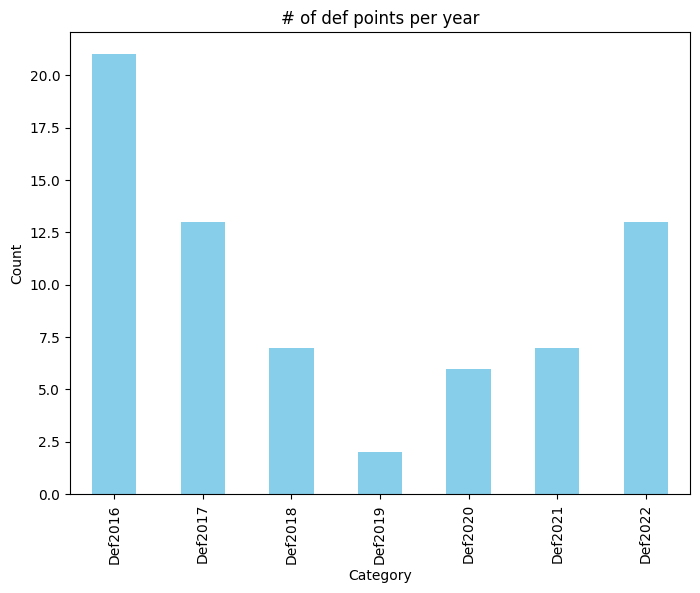

In [47]:
#select the values you want to plot
values_to_plot = ['Def2016','Def2017','Def2018','Def2019','Def2020','Def2021','Def2022']

# Filter the DataFrame to include only the selected values
filtered_df = esbae_ceo[esbae_ceo['Ref_Change_Year_1522'].isin(values_to_plot)]

# Get the value counts and sort by index (alphabetically)
defvalue_counts = filtered_df['Ref_Change_Year_1522'].value_counts().sort_index()

# Plot the value counts as a bar graph
plt.figure(figsize=(8, 6))  # Optional: Set the figure size
defvalue_counts.plot(kind='bar', color='skyblue')


# Set plot labels and title
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('# of def points per year')

# Show the plot
plt.show()

##### plot degradation points by year

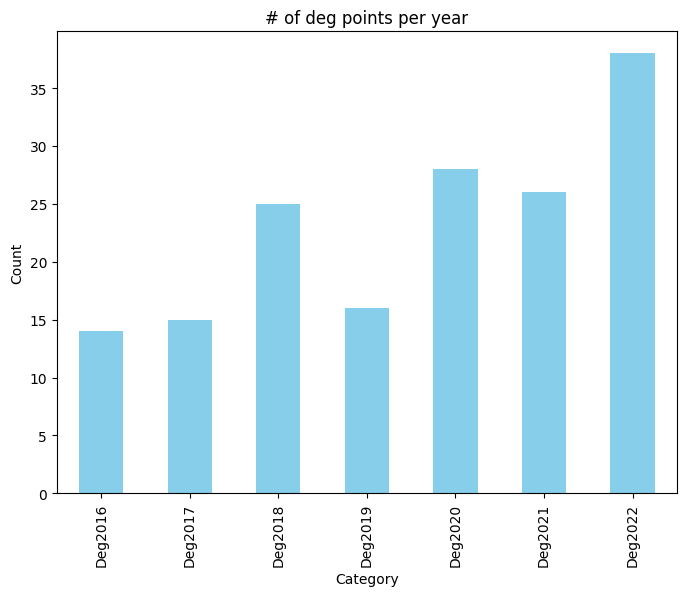

In [48]:
#plot DEG 
#select the values you want to plot
values_to_plot = ['Deg2016','Deg2017','Deg2018','Deg2019','Deg2020','Deg2021','Deg2022']

# Filter the DataFrame to include only the selected values
filtered_df = esbae_ceo[esbae_ceo['Ref_Change_Year_1522'].isin(values_to_plot)]

# Get the value counts and sort by index (alphabetically)
degvalue_counts = filtered_df['Ref_Change_Year_1522'].value_counts().sort_index()

# Plot the value counts as a bar graph
plt.figure(figsize=(8, 6))  # Optional: Set the figure size
degvalue_counts.plot(kind='bar', color='skyblue')


# Set plot labels and title
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('# of deg points per year')

# Show the plot
plt.show()

In [49]:
print(esbae_ceo.columns.values)

['images' 'mon_images' 'bfast_change_date' 'bfast_magnitude' 'bfast_means'
 'cusum_change_date' 'cusum_confidence' 'cusum_magnitude' 'red_mean'
 'red_sd' 'red_min' 'red_max' 'nir_mean' 'nir_sd' 'nir_min' 'nir_max'
 'swir1_mean' 'swir1_sd' 'swir1_min' 'swir1_max' 'swir2_mean' 'swir2_sd'
 'swir2_min' 'swir2_max' 'ndfi_mean' 'ndfi_sd' 'ndfi_min' 'ndfi_max'
 'brightness_mean' 'brightness_sd' 'brightness_min' 'brightness_max'
 'greenness_mean' 'greenness_sd' 'greenness_min' 'greenness_max'
 'wetness_mean' 'wetness_sd' 'wetness_min' 'wetness_max' 'bs_slope_mean'
 'bs_slope_sd' 'bs_slope_max' 'bs_slope_min' 'ccdc_change_date'
 'ccdc_magnitude' 'aspect' 'dw_class_mode' 'dw_tree_prob__max'
 'dw_tree_prob__min' 'dw_tree_prob__stdDev' 'dw_tree_prob_mean'
 'elevation' 'esa_lc20' 'esa_lc21' 'esri_lc17' 'esri_lc18' 'esri_lc19'
 'esri_lc20' 'esri_lc21' 'gfc_gain' 'gfc_loss' 'gfc_lossyear' 'gfc_tc00'
 'lang_tree_height' 'potapov_tree_height' 'slope' 'tmf_2016' 'tmf_2017'
 'tmf_2018' 'tmf_2019' 'tmf_20

In [50]:
merged_annual_counts = esbae_ceo['Ref_Change_Year_1522'].value_counts()
merged_annual_counts = merged_annual_counts.sort_index()
merged_annual_counts

Def2016      21
Def2017      13
Def2018       7
Def2019       2
Def2020       6
Def2021       7
Def2022      13
Deg2016      14
Deg2017      15
Deg2018      25
Deg2019      16
Deg2020      28
Deg2021      26
Deg2022      38
NF         1238
Stable     5070
Name: Ref_Change_Year_1522, dtype: int64

In [51]:
esbae_ceo.describe()

,images,mon_images,bfast_change_date,bfast_magnitude,bfast_means,cusum_change_date,cusum_confidence,cusum_magnitude,red_mean,red_sd,red_min,red_max,nir_mean,nir_sd,nir_min,nir_max,swir1_mean,swir1_sd,swir1_min,swir1_max,swir2_mean,swir2_sd,swir2_min,swir2_max,ndfi_mean,ndfi_sd,ndfi_min,ndfi_max,brightness_mean,brightness_sd,brightness_min,brightness_max,greenness_mean,greenness_sd,greenness_min,greenness_max,wetness_mean,wetness_sd,wetness_min,wetness_max,bs_slope_mean,bs_slope_sd,bs_slope_max,bs_slope_min,ccdc_change_date,ccdc_magnitude,aspect,dw_class_mode,dw_tree_prob__max,dw_tree_prob__min,dw_tree_prob__stdDev,dw_tree_prob_mean,elevation,esa_lc20,esa_lc21,esri_lc17,esri_lc18,esri_lc19,esri_lc20,esri_lc21,gfc_gain,gfc_loss,gfc_lossyear,gfc_tc00,lang_tree_height,potapov_tree_height,slope,tmf_2016,tmf_2017,tmf_2018,tmf_2019,tmf_2020,tmf_defyear,tmf_degyear,tmf_main,tmf_sub,point_id,cnc_1520,CAFI_LC_2015,chg_prob,simple_combined,kmeans,plotid,lon,lat,sampleid,Ref_Year,collection,interpreted,Def2016,Def2017,Def2018,Def2019,Def2020,Def2021,Def2022,Deg2016,Deg2017,Deg2018,Deg2019,Deg2020,Deg2021,Deg2022,Defall,Degall,Stable,NF,stratum
count,222878.000000,222878.000000,222878.000000,222878.000000,2.228780e+05,222878.000000,222878.000000,222878.000000,222878.000000,222878.000000,222878.00000,222878.000000,222878.000000,222878.000000,222878.00000,222878.000000,222878.000000,222878.000000,222878.00000,222878.000000,222878.000000,222878.000000,222878.00000,222878.000000,222878.000000,222878.000000,222878.00000,222878.000000,222878.000000,222878.000000,222878.00000,222878.000000,222878.000000,222878.000000,222878.00000,222878.000000,222878.000000,222878.000000,222878.00000,222878.000000,222878.000000,222878.000000,222878.000000,222878.000000,222878.000000,222878.000000,222878.000000,222523.000000,222523.000000,222523.000000,222523.000000,222523.000000,222878.000000,222878.000000,222878.000000,222878.000000,222878.000000,222878.000000,220564.000000,222878.000000,222878.000000,222878.000000,8594.000000,222878.000000,216896.000000,222878.000000,222878.000000,222878.000000,222878.000000,222878.000000,222878.000000,222878.000000,222878.000000,222878.000000,222878.000000,222878.000000,222878.000000,0.0,222878.000000,222878.000000,222878.000000,222878.000000,222878.000000,222878.000000,222878.000000,6539.000000,231.000000,6539.000000,222878.000000,6539.000000,6539.000000,6539.000000,6539.000000,6539.000000,6539.000000,6539.000000,6539.000000,6539.000000,6539.000000,6539.000000,6539.000000,6539.000000,6539.000000,6539.000000,6539.000000,6539.000000,6539.000000,222878.000000
mean,54.770480,36.414254,1620.747038,-3.936606,-2.418103e+07,2019.863104,0.180397,7555.439516,8982.382143,878.493371,6002.95281,9848.048646,8982.382143,878.493371,6002.95281,9848.048646,8982.382143,878.493371,6002.95281,9848.048646,8982.382143,878.493371,6002.95281,9848.048646,8982.382143,878.493371,6002.95281,9848.048646,8982.382143,878.493371,6002.95281,9848.048646,8982.382143,878.493371,6002.95281,9848.048646,8982.382143,878.493371,6002.95281,9848.048646,24.261766,62.404433,216.740851,-166.934007,357.346060,-139.212613,179.698903,1.098363,70.977863,27.035601,12.430212,61.805584,377.500329,12.975036,12.785964,2.726038,2.683446,2.651670,2.658226,2.805216,0.000960,0.020352,12.204212,84.136528,30.810596,25.527163,6.961732,1.444503,1.446899,1.449232,1.451543,1.452669,11.141166,44.216332,15.441793,17.291213,112590.241756,NaN,2.655758,0.084998,0.084998,1.272678,112590.241756,11.789000,-0.605674,70303.029362,2019.259740,2.964215,0.029339,0.003212,0.001988,0.001071,0.000306,0.000918,0.001071,0.001988,0.002141,0.002294,0.003823,0.002447,0.004282,0.003976,0.005811,0.010552,0.024774,0.775348,0.189326,1.282971
std,22.277351,15.406316,802.964585,3507.699885,1.179744e+09,2.171179,0.156176,9692.568721,1892.420847,830.488473,4035.28847,825.362366,1892.420847,830.488473,4035.28847,825.362366,1892.420847,830.488473,4035.28847,825.362366,1892.420847,830.488473,4035.28847,825.362366,1892.420

In [52]:
print(esbae_ceo.dtypes)

images                    int64
mon_images                int64
bfast_change_date       float64
bfast_magnitude         float64
bfast_means             float64
cusum_change_date       float64
cusum_confidence        float64
cusum_magnitude         float64
red_mean                float64
red_sd                  float64
red_min                 float64
red_max                 float64
nir_mean                float64
nir_sd                  float64
nir_min                 float64
nir_max                 float64
swir1_mean              float64
swir1_sd                float64
swir1_min               float64
swir1_max               float64
swir2_mean              float64
swir2_sd                float64
swir2_min               float64
swir2_max               float64
ndfi_mean               float64
ndfi_sd                 float64
ndfi_min                float64
ndfi_max                float64
brightness_mean         float64
brightness_sd           float64
brightness_min          float64
brightne

In [ ]:
esbae_ceo['sampling'] = 'systematic'

##### export merged esbae and ceo data to one csv file for next step

In [ ]:
esbae_ceo_data_out =  '/home/sepal-user/module_results/esbae/GAB/GAB_esbae_ceo_1522_merge.csv'
#esbae_ceo_data_out =  '/home/sepal-user/module_results/esbae/DRC/DRC_esbae_ceo_1522_merge.csv'
#esbae_ceo_data_out =  '/home/sepal-user/module_results/esbae/COG/COG_esbae_ceo_1522_merge.csv'
#esbae_ceo_data_out =  '/home/sepal-user/module_results/esbae/EQG/EQG_esbae_ceo_1522_merge.csv'
#esbae_ceo_data_out =  '/home/sepal-user/module_results/esbae/CMR/CMR_esbae_ceo_1522_merge.csv'
#esbae_ceo_data_out =  '/home/sepal-user/module_results/esbae/CAR/CAR_esbae_ceo_1522_merge.csv'

esbae_ceo.to_csv(esbae_ceo_data_out,index=False)